## IFN704 - Evaluating Classic ML and DL Models on Big-Vul Dataset for vulnerability detection
This Jupyter notebook is for reproductive purpose of the result. The code containing few steps of evaluating code.
The DL model is running individually from this code due to techincal issues.
For consistency, the version of dataset utilised in this evaluation is the same as the DL model - LineVul instead of the original version of dataset.

In [59]:
#import necessary module for analysis
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express  as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [60]:
#Develop function
#Bar chart generation
def bar(df):
    df.plot(kind='bar')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title('Distribution of Categories')
    return plt.show()
#Filter the dataframe
def filtered(df, list):
    df1 = df[list]
    return df1
#Get the brief idea of the dataframe
def uni(df,list):
    df_1 = df[list]
    df_2 = df_1.value_counts()
    return df_2
#Function getting smaller size of dataset and split dataset to 80/10/10
#ini = 0.2, sec = 0.5 for 80/10/10
def minisplit(df, ini, sec):
    import re
    train, val_test = train_test_split(df, test_size= ini, random_state=42)
    val, test = train_test_split(val_test,test_size=sec, random_state=43) #80/20 split
    train.to_csv('train.csv', index = False)
    val.to_csv('val.csv', index = False)
    test.to_csv('test.csv', index = False)  
    return train, val, test

In [61]:
#Loading data
data = pd.read_csv(r'~/Downloads/processed_data.csv')
#Feature Selection (The same as LineVul)
lis3 = ['target','func_before', 'vul_func_with_fix']

/var/folders/7f/8ql35fn944dgmyz80f7krqw00000gn/T/ipykernel_29202/3462192043.py:2: DtypeWarning: Columns (20,22,23,27,28,29,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'~/Downloads/processed_data.csv')


In [62]:
#Create randomly selected 10% size of original dataset for DL model and trial
import re
nd = data.sample(frac = 0.1)
train, val_test = train_test_split(nd, test_size= 0.2, random_state=42)
val, test = train_test_split(val_test,test_size = 0.5, random_state=43) #80/20 split

#train.to_csv('train.csv', index = False)
#val.to_csv('val.csv', index = False)
#test.to_csv('test.csv', index = False)
print("Training dataset size: {}".format(len(train)))
print("Validation dataset size: {}".format(len(val)))
print("Test dataset size:{}".format(len(test)))

Training dataset size: 15091
Validation dataset size: 1886
Test dataset size:1887


The trial is to evaluate the different dataset to eliminate the noise of ML and improve the performance of traditional ML model as much as possible.
The traditional ML model is Random Forest Classification for classifying the vulnerability as supervised machine learning.
The dataset is set in the following setting.
- For efficiency purpose, the original dataset is randomly selected and shrinked the size to 10% of it.
    - This will be run on LineVul and traditional ML model.
    - For its imbalanced nature, the result will be set as baseline and compared in the LineVul paper
- For imbalanced nature the dataset is resampled in two ways. (Downsampling)
    - resampling from the 10% of original dataset 
    - resampling from the original dataset (10900/10900)

Three kind of small dataset

In [5]:
#Develop function for downsampling
#(len(maj_class)-int((2*min_size)/3))

def downsample(df):
    import pandas as pd
    from sklearn.utils import resample
    maj_class = df[df['target'] == 0]
    min_class = df[df['target'] == 1]
    min_size = len(min_class)
    maj_class_down = resample(
        maj_class, replace=False, n_samples=min_size, random_state=42
    )
    df_ds = pd.concat([maj_class_down, min_class])
    return df_ds
#sanity check
def san(df_ds):
    value_counts = df_ds['target'].value_counts()
    import matplotlib.pyplot as plt
    plt.bar(value_counts.index, value_counts.values)
    plt.title('Count of 0s and 1s in target (Check)')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(value_counts.index, ['0', '1'])
    return plt.show(), print(value_counts)
#Dataset split function #Make sure I indicate the X_train, y_train, X_val, y_val, X_test, y_test = split_data(X,y,initial_ratio, test_valid_ratio)
def split_data (X, y, initial_ratio, test_valid_ratio):
    #Split the dataset into training, testing and validation
    from sklearn.model_selection import train_test_split

    # Split into training and temporary (validation + test) sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = initial_ratio, random_state=42)

    # Split the temporary set into validation and test sets
    X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size= test_valid_ratio, random_state=42)

    # Now you have X_train, y_train for training, X_validation, y_validation for validation, and X_test, y_test for testing
    return X_train, y_train, X_validation, X_test, y_validation, y_test

def split_simple (X, y, initial_ratio):
    #Split the dataset
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=initial_ratio, random_state=42)
    return X_train, X_test, y_train, y_test

def X_func(df):
    return df['func_before']
def Y_func(df):
    return df['target']

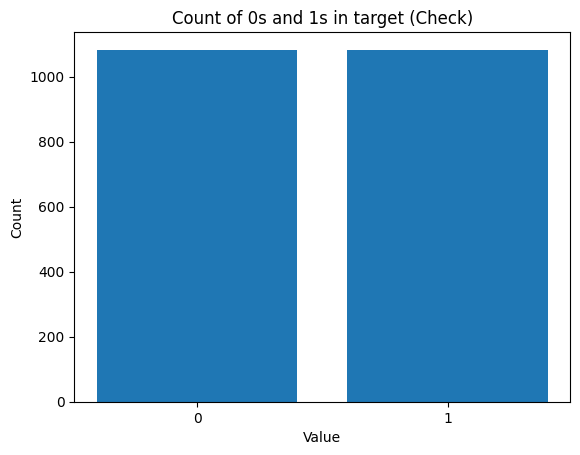

0    1083
1    1083
Name: target, dtype: int64


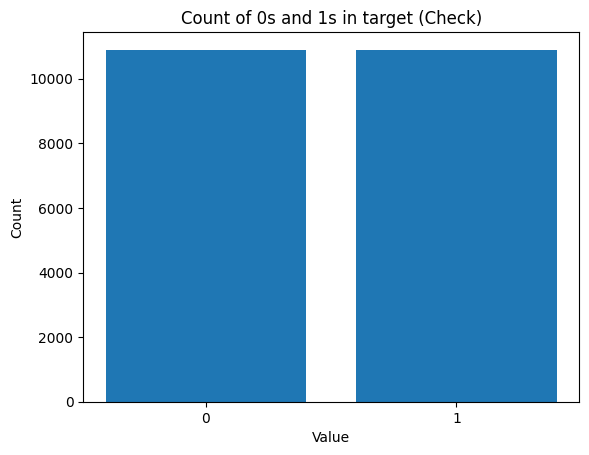

0    10900
1    10900
Name: target, dtype: int64


(         index Access Gained Attack Origin Authentication Required  \
 188120  188120          None        Remote            Not required   
 30996    30996          None         Local            Not required   
 180112  180112          None        Remote            Not required   
 47841    47841          None         Local            Not required   
 156339  156339          None        Remote            Not required   
 ...        ...           ...           ...                     ...   
 184711  184711          None        Remote            Not required   
 182894  182894          None         Local            Not required   
 182105  182105          None        Remote            Not required   
 178738  178738          None        Remote            Not required   
 149117  149117          None        Remote            Not required   
 
        Availability            CVE ID  \
 188120     Complete     CVE-2018-9490   
 30996          None     CVE-2013-2636   
 180112      Partial

In [58]:
#Balanced dataset for 10% of original dataset
df_sb = downsample(nd)
san(df_sb)

#Balanaced dataset for original dataset
df_od = downsample(data)
san(df_od)
#minisplit(df_od,0.2,0.5)
minisplit(df_sb,0.2,0.5)

In [78]:
countdata.count()

index                           188636
Access Gained                   174614
Attack Origin                   174614
Authentication Required         174614
Availability                    174614
CVE ID                          175196
CVE Page                        174614
CWE ID                          152431
Complexity                      174614
Confidentiality                 174614
Integrity                       174614
Known Exploits                       0
Publish Date                    174614
Score                           174614
Summary                         174614
Update Date                     188636
Vulnerability Classification    132720
add_lines                       188636
codeLink                        188636
commit_id                       188636
commit_message                  168985
del_lines                       188636
file_name                       169571
files_changed                   169571
func_after                      188636
func_before              

In [63]:
#Filter the dataset to the wanted features
df_od = filtered(df_od, lis3) #10900/10900 balanced dataset
df_sb = filtered(df_sb, lis3) #extreme small balanced dataset
df_nd = filtered(nd, lis3) #10% imbalanced dataset

In [74]:
#Set X and y for ML
#replace dataset with desired dataset
X = df_nd['func_before']  # Code snippets
y = df_nd['target']  # Vulnerability labels

In [14]:
# BoW vectorise
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Preprocessing
# Assuming your dataset has a 'text' column containing code snippets and a 'label' column with vulnerability labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Extraction (Using Bag of Words)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 3: Train a Random Forest Classifier
# You can adjust hyperparameters like n_estimators, max_depth, etc., based on your dataset
rf_classifier = RandomForestClassifier(n_estimators=1000, max_depth=200, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

# Step 4: Make Predictions
y_pred = rf_classifier.predict(X_test_vectorized)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Simple Vectoriser BoW")
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


Simple Vectoriser BoW
Accuracy: 0.6129032258064516
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.78      0.67       219
           1       0.66      0.45      0.53       215

    accuracy                           0.61       434
   macro avg       0.63      0.61      0.60       434
weighted avg       0.62      0.61      0.60       434



In [43]:
#Simple Tokenise and BoW vectorise
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize  # Import the tokenization library you want to use

# Define a function for tokenization
def tokenize_code(code):
    tokens = word_tokenize(code)
    return ' '.join(tokens)

# Assuming your dataset has a 'text' column containing code snippets and a 'label' column with vulnerability labels
# Replace X and y with your actual dataset

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the code snippets
X_train_tokenized = X_train.apply(tokenize_code)
X_test_tokenized = X_test.apply(tokenize_code)

# Vectorize the Tokenized Text (Using Bag of Words)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_tokenized)
X_test_vectorized = vectorizer.transform(X_test_tokenized)

# Train a Random Forest Classifier
# You can adjust hyperparameters like n_estimators, max_depth, etc., based on your dataset
rf_classifier = RandomForestClassifier(n_estimators=1000, max_depth=200, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

# Make Predictions
y_pred = rf_classifier.predict(X_test_vectorized)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Tokenize and Vectorize with BoW")
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/chiuchunhao/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/7f/8ql35fn944dgmyz80f7krqw00000gn/T/ipykernel_29202/2733888568.py", line 26, in <module>
    X_train_vectorized = vectorizer.fit_transform(X_train_tokenized)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py", line 1383, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extra

In [ ]:
#Simple TF-IDF vec and tokenise
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
import numpy as np

# Define a function for tokenization
def tokenize_code(code):
    tokens = word_tokenize(code)
    return ' '.join(tokens)

# Assuming your dataset has a 'text' column containing code snippets and a 'label' column with vulnerability labels
# Replace X and y with your actual dataset

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the code snippets
X_train_tokenized = X_train.apply(tokenize_code)
X_test_tokenized = X_test.apply(tokenize_code)

# Vectorize the Tokenized Text (Using Bag of Words)
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_tokenized)
X_test_vectorized = vectorizer.transform(X_test_tokenized)

# Train a Random Forest Classifier
# You can adjust hyperparameters like n_estimators, max_depth, etc., based on your dataset
rf_classifier = RandomForestClassifier(n_estimators=1000, max_depth=200, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

# Make Predictions
y_pred = rf_classifier.predict(X_test_vectorized)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Tokenize and Vectorize with TF-IDF")
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


Tokenize and Vectorize with TF-IDF
Accuracy: 0.6221198156682027
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.77      0.67       219
           1       0.67      0.47      0.55       215

    accuracy                           0.62       434
   macro avg       0.63      0.62      0.61       434
weighted avg       0.63      0.62      0.61       434



In [ ]:
#Optimised 10 fold cross


In [70]:
#TF-IDF 10-fold cross validation #Index need to be continuous
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.metrics import roc_auc_score

# Assuming you already have X and y defined as your dataset

# Tokenize the code snippets
def tokenize_code(code):
    tokens = word_tokenize(code)
    return ' '.join(tokens)

# Vectorize the Tokenized Text (Using TF-IDF)
tfidf_vectorizer = TfidfVectorizer()

# Initialize lists to store cross-validation results
cv_accuracies = []
cv_auc = []
cv_classification_reports = []

X = X.reset_index(drop=True)  # Reset index to avoid using indices
y = y.reset_index(drop=True)

# Perform 10-fold cross-validation n_splits = fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train_tokenized = [tokenize_code(code) for code in X_train]
    X_test_tokenized = [tokenize_code(code) for code in X_test]

    X_train_vectorized = tfidf_vectorizer.fit_transform(X_train_tokenized)
    X_test_vectorized = tfidf_vectorizer.transform(X_test_tokenized)

    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
    rf_classifier.fit(X_train_vectorized, y_train)

    y_pred = rf_classifier.predict(X_test_vectorized)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    #
    y_probabilities = rf_classifier.predict_proba(X_test_vectorized)[:, 1]
    auc = roc_auc_score(y_test, y_probabilities)
    #
    cv_accuracies.append(accuracy)
    cv_classification_reports.append(classification_rep)
    cv_auc.append(auc)

# Calculate and print the average accuracy and classification report across folds
average_accuracy = np.mean(cv_accuracies)
average_classification_report = "\n\n".join(cv_classification_reports)

print("Tokenize & TF-IDF Vec with 10-fold Cross-Validation")
print(cv_accuracies)
print(cv_auc)
print(f'Average Accuracy: {average_accuracy}')
print('Average Classification Report:')
print(average_classification_report)

from sklearn.metrics import roc_auc_score
y_probabilities = rf_classifier.predict_proba(X_test_vectorized)[:, 1]
auc = roc_auc_score(y_test, y_probabilities)
print(auc)


Tokenize & TF-IDF Vec with 10-fold Cross-Validation
[0.631336405529954, 0.5944700460829493, 0.6912442396313364, 0.7050691244239631, 0.5944700460829493, 0.5898617511520737, 0.6574074074074074, 0.6712962962962963, 0.6435185185185185, 0.6527777777777778]
[0.7226044852191641, 0.6691726129799523, 0.7487257900101937, 0.7428219503907578, 0.6885406048250085, 0.6444104655113829, 0.738468792866941, 0.719221536351166, 0.7237225651577502, 0.7055469821673526]
Average Accuracy: 0.6431451612903226
Average Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.76      0.67       109
           1       0.68      0.50      0.57       108

    accuracy                           0.63       217
   macro avg       0.64      0.63      0.62       217
weighted avg       0.64      0.63      0.62       217


              precision    recall  f1-score   support

           0       0.58      0.70      0.63       109
           1       0.62      0.49      0.55 

In [75]:
#BoW vec and tokenise 10-fold cross validation #Index should be continuous
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.metrics import roc_auc_score

# Assuming you already have X and y defined as your dataset

# Tokenize the code snippets
def tokenize_code(code):
    tokens = word_tokenize(code)
    return ' '.join(tokens)

# Vectorize the Tokenized Text (Using BoW)
tfidf_vectorizer = CountVectorizer()

# Initialize lists to store cross-validation results
cv_accuracies = []
cv_auc = []
cv_classification_reports = []

X = X.reset_index(drop=True)  # Reset index to avoid using indices
y = y.reset_index(drop=True)

# Perform 10-fold cross-validation n_splits = fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train_tokenized = [tokenize_code(code) for code in X_train]
    X_test_tokenized = [tokenize_code(code) for code in X_test]

    X_train_vectorized = tfidf_vectorizer.fit_transform(X_train_tokenized)
    X_test_vectorized = tfidf_vectorizer.transform(X_test_tokenized)

    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
    rf_classifier.fit(X_train_vectorized, y_train)

    y_pred = rf_classifier.predict(X_test_vectorized)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    y_probabilities = rf_classifier.predict_proba(X_test_vectorized)[:, 1]
    auc = roc_auc_score(y_test, y_probabilities)
    cv_accuracies.append(accuracy)
    cv_classification_reports.append(classification_rep)
    cv_auc.append(auc)

# Calculate and print the average accuracy and classification report across folds
average_accuracy = np.mean(cv_accuracies)
average_classification_report = "\n\n".join(cv_classification_reports)

print("Tokenize & BoW with 10-fold Cross-Validation")
print(cv_accuracies)
print(cv_auc)
print(f'Average Accuracy: {average_accuracy}')
print('Average Classification Report:')
print(average_classification_report)



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metr

Tokenize & BoW with 10-fold Cross-Validation
[0.9432962374138845, 0.9432962374138845, 0.9427662957074722, 0.9427662957074722, 0.943796394485684, 0.943796394485684, 0.9443266171792153, 0.9443266171792153, 0.9443266171792153, 0.943796394485684]
[0.7606190276173475, 0.7667254803988924, 0.6453063518830804, 0.7569743717860637, 0.7030201783003157, 0.6888859119635624, 0.7525465845035275, 0.7404532631479409, 0.7139341118868628, 0.6891617153393957]
Average Accuracy: 0.9436494101237412
Average Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1780
           1       0.00      0.00      0.00       107

    accuracy                           0.94      1887
   macro avg       0.47      0.50      0.49      1887
weighted avg       0.89      0.94      0.92      1887


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1779
           1       0.67      0.02      0.04       1

In [68]:
import pandas as pd
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    text = ' '.join([word for word in tokens if word not in stop_words])
    return text

# Assuming your dataset has a 'text' column containing code snippets and a 'label' column with vulnerability labels
# Replace X and y with your actual dataset

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the code snippets
X_train_preprocessed = X_train.apply(preprocess_text)
X_test_preprocessed = X_test.apply(preprocess_text)

# Vectorize the Preprocessed Text (Using TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000, sublinear_tf=True)
X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)
X_test_vectorized = vectorizer.transform(X_test_preprocessed)

# Train a Random Forest Classifier
# You can adjust hyperparameters like n_estimators, max_depth, etc., based on your dataset
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)

# Make Predictions
y_pred = rf_classifier.predict(X_test_vectorized)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Tokenize and Vectorize with TF-IDF")
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chiuchunhao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenize and Vectorize with TF-IDF
Accuracy: 0.9430161675059634
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3551
           1       0.71      0.05      0.10       222

    accuracy                           0.94      3773
   macro avg       0.82      0.53      0.54      3773
weighted avg       0.93      0.94      0.92      3773



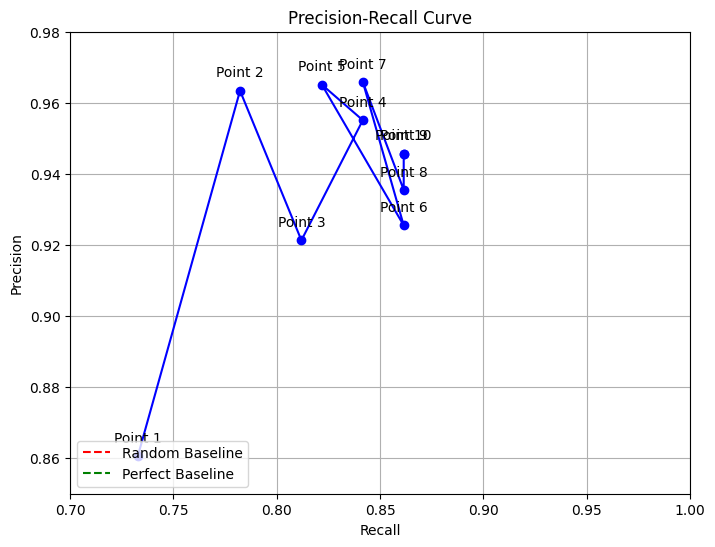

In [52]:
import matplotlib.pyplot as plt

precision = [0.8605, 0.9634, 0.9213, 0.9551, 0.9651, 0.9255, 0.9659, 0.9355, 0.9457, 0.9457]
recall = [0.7327, 0.7822, 0.8119, 0.8416, 0.8218, 0.8614, 0.8416, 0.8614, 0.8614, 0.8614]

# Labels for data points
labels = ['Point 1', 'Point 2', 'Point 3', 'Point 4', 'Point 5', 'Point 6', 'Point 7', 'Point 8', 'Point 9', 'Point 10']

# Baseline values
random_baseline_precision = [0.5] * len(recall)  # Random guessing
perfect_baseline_precision = [1.0] * len(recall)  # Perfect classifier

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', linestyle='-', color='b')

# Add labels to data points
for i, label in enumerate(labels):
    plt.annotate(label, (recall[i], precision[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Plot random and perfect baselines
plt.plot(recall, random_baseline_precision, linestyle='--', color='r', label='Random Baseline')
plt.plot(recall, perfect_baseline_precision, linestyle='--', color='g', label='Perfect Baseline')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.xlim([0.7, 1.0])  # Set x-axis limits for better visualization
plt.ylim([0.85, 0.98])  # Set y-axis limits for better visualization

# Add legend
plt.legend(loc='lower left')

# Show the plot
plt.show()
